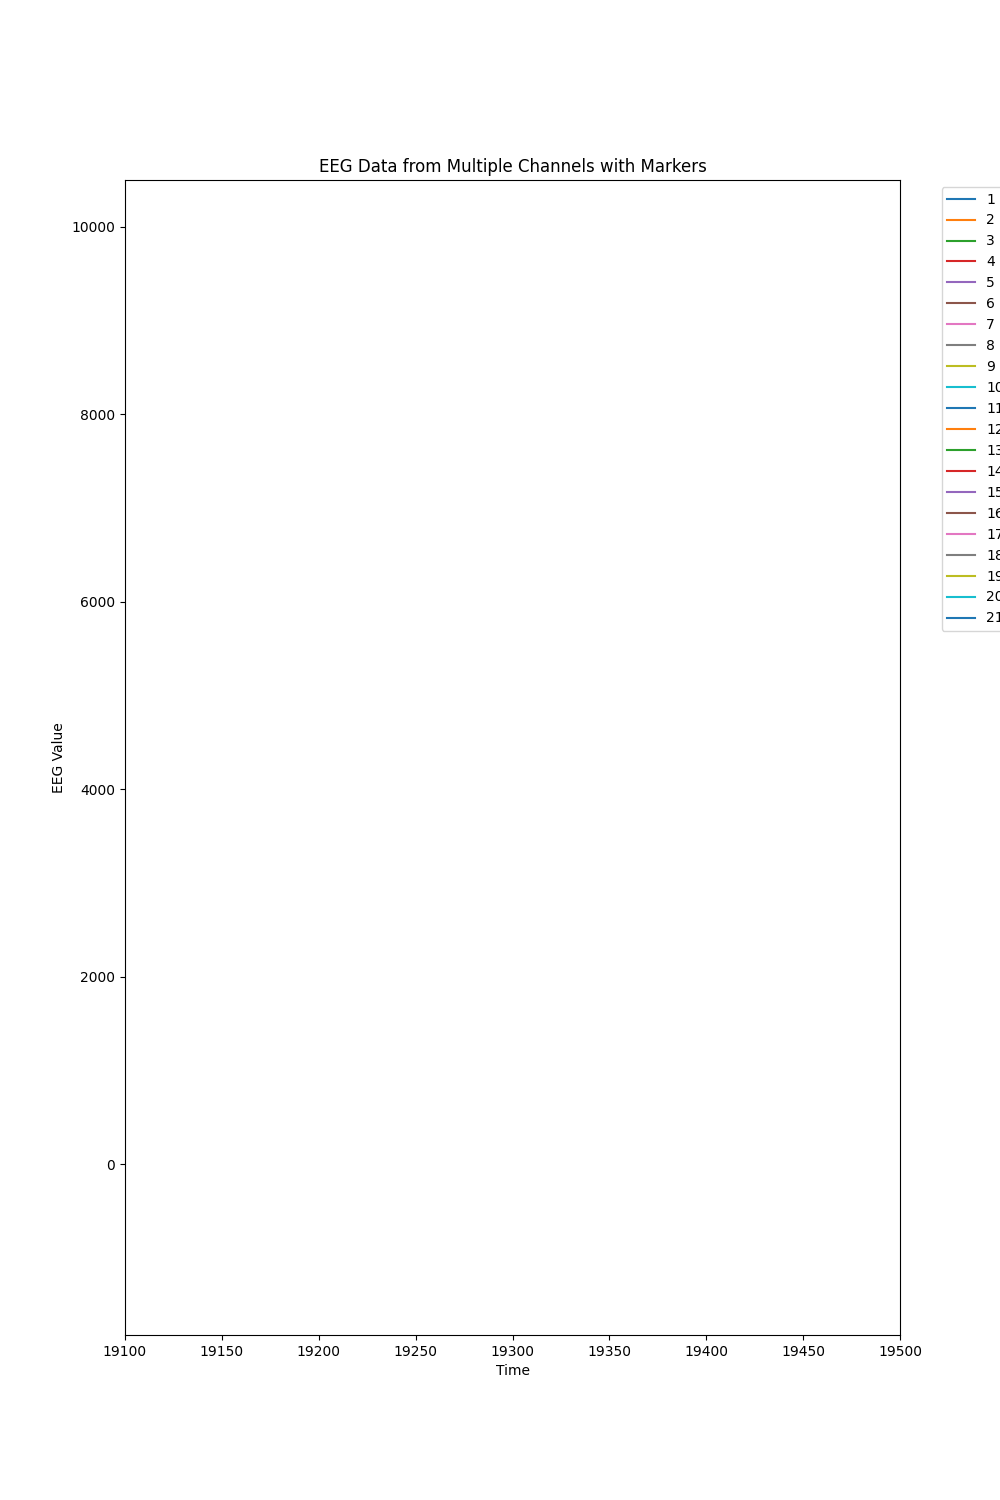

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipympl
import numpy as np

# Enable interactive plots
    
%matplotlib widget

# Load the data
eeg_data = pd.read_csv('./2024-06-11 13-48-58_EEG_01_15_Hz.csv')
markers = pd.read_csv('./2024-06-11 13-48-58_markers.csv')


# Display the first few rows of each dataframe to understand their structure
# print(eeg_data.head())
# print(markers.head())



# rename columns
electrode_names = ['Col','Fp1', 'Fp2', 'Fz', 'F3', 'F4', 'F7', 'F8', 'Cz', 'C3', 'C4', 'T3', 'T4', 'T5', 'T6','Pz', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'Unsure', 'Unsure1', 'Trigger', 'time_stamps']
eeg_data.columns = electrode_names 
# eeg_data = eeg_data.drop(columns=['Unsure', 'Unsure1', 'Trigger'])


# Assuming the EEG data has columns named 'Channel1', 'Channel2', ..., 'Channel24' and 'Time'
channel_columns = eeg_data.columns[1:-1]  # All columns except the first last one
time_column = eeg_data.columns[-1]  # The last column


# Slice the data to plot every 100th row
eeg_data_sliced = eeg_data #.iloc[::10, :]


# assign labels to marker columns
markers.columns = [' ', 'Marker', 'Time']

# Plot the EEG data for all channels
plt.figure(figsize=(10, 15))

for index, channel in enumerate(channel_columns):
    if ((index+1) != 22 and (index+1) != 23):
        plt.plot(eeg_data_sliced[time_column], eeg_data_sliced[channel], label=(index+1))

# Mark events on the EEG plot
for index, row in markers.iterrows():
    if (len(row['Marker']) == 12): # isolate p300 markers (not 0, Trial Started, Trial Ended)
        if (str(row['Marker'])[9] == str(row['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
            plt.plot(row['Time'], 50, marker='o', color='r', linestyle='--')
        else:
            plt.plot(row['Time'], 50, marker='o', color='b', linestyle='--')



# Set x-axis limit (HAVE TO CHANGE FOR EACH DATASET)
plt.xlim(left=19100, right=19500)


plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.title('EEG Data from Multiple Channels with Markers')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


Creating RawArray with float64 data, n_channels=13, n_times=68400
    Range : 0 ... 68399 =      0.000 ...   227.997 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 991 samples (3.303 s)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.5s.


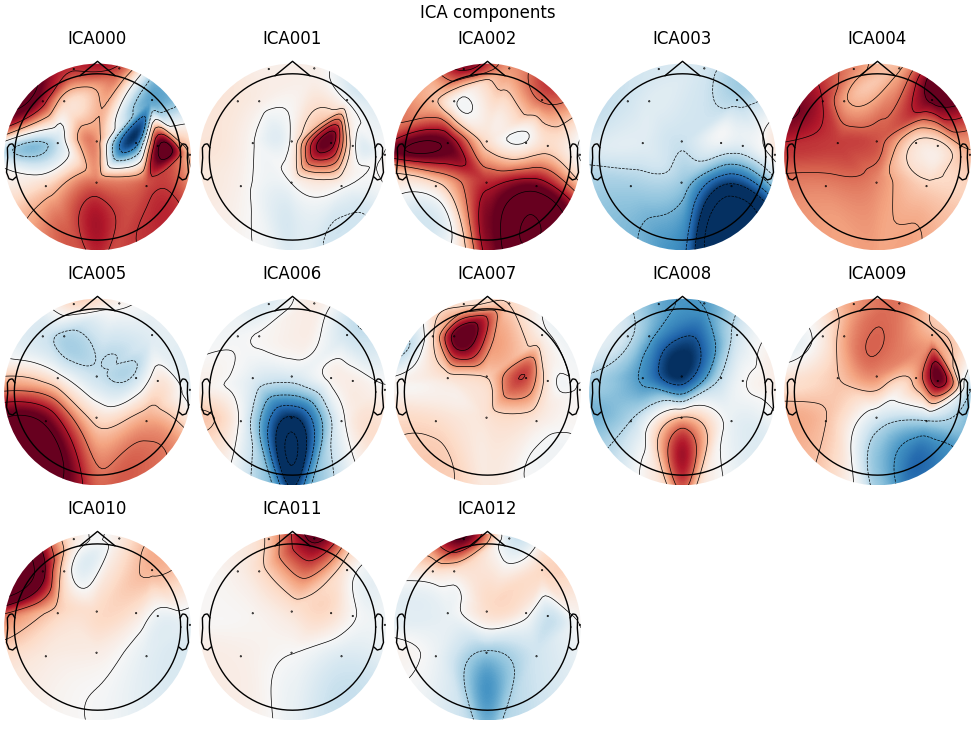

Creating RawArray with float64 data, n_channels=13, n_times=68400
    Range : 0 ... 68399 =      0.000 ...   227.997 secs
Ready.


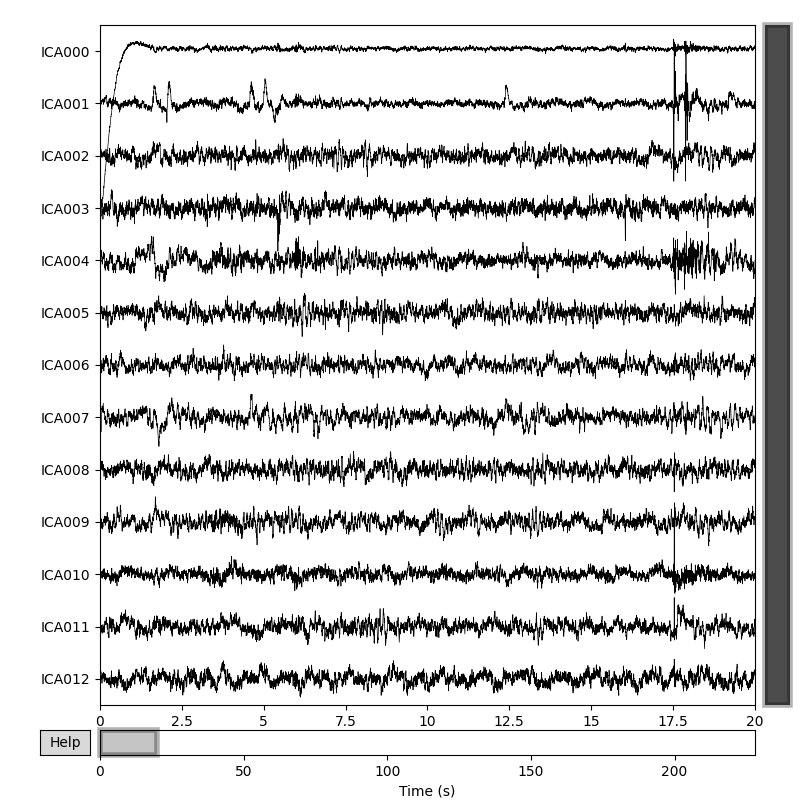

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 13 PCA components


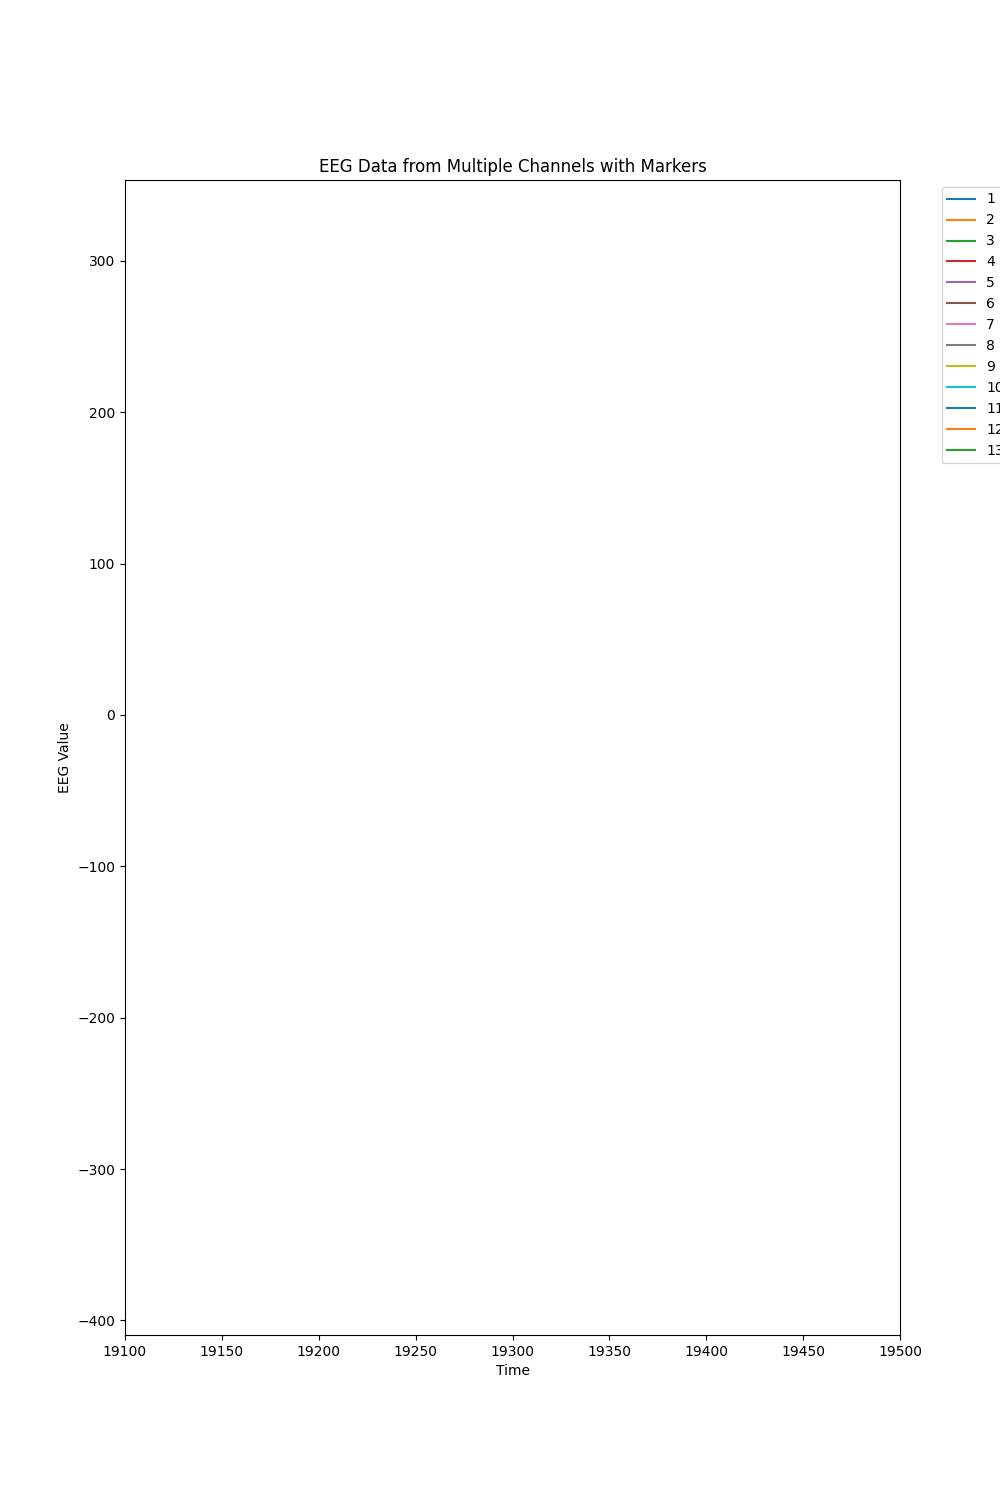

In [4]:
# Define a function to identify bad channels based on variance (MAY NEED TO CHANGE EACH TIME TOO)

from mne import create_info, EpochsArray
from mne.io import RawArray
from mne.preprocessing import ICA
from mne.filter import filter_data
from mne.channels import make_standard_montage


def identify_bad_channels(eeg_data, high_threshold=10000.0, low_threshold=50):
    variances = eeg_data.var(axis=0)
    bad_channels = variances[(variances > high_threshold) | (variances < low_threshold)].index
    return bad_channels

# Identify bad channels
bad_channels = identify_bad_channels(eeg_data[channel_columns])

# Remove bad channels from the data
eeg_data_filtered = eeg_data.drop(columns=bad_channels)
channel_columns_filtered = eeg_data_filtered.columns[1:-1]  # Update channel columns after filtering

# # Convert the EEG data to MNE RawArray format
# sfreq = 300  # Define your sampling frequency
# info = create_info(ch_names=channel_columns_filtered.tolist(), sfreq=sfreq, ch_types='eeg')

# # Add standard electrode locations
# montage = make_standard_montage('standard_1020')
# info.set_montage(montage)

# raw = RawArray(eeg_data_filtered[channel_columns_filtered].T.values, info)
# raw.filter(l_freq=1.0, h_freq=None)

# # Perform ICA
# ica = ICA(n_components=len(channel_columns_filtered), random_state=97, max_iter='auto')
# ica.fit(raw)

# # Plot ICA components to identify artifacts manually (e.g., eyeblinks, muscle artifacts)
# ica.plot_components()
# ica.plot_sources(raw) 

# # Exclude components corresponding to artifacts (you need to identify these manually)
# ica.exclude = [1]  # Replace with the indices of components to exclude

# # Apply ICA to remove artifacts
# raw_clean = raw.copy()
# ica.apply(raw_clean)

# Plot the EEG data for all channels
plt.figure(figsize=(10, 15))

for index, channel in enumerate(channel_columns_filtered):
    if ((index+1) != 22 and (index+1) != 23):
        plt.plot(eeg_data_filtered[time_column], raw_clean.get_data()[index, :], label=(index+1))

# Mark events on the EEG plot
for index, row in markers.iterrows():
    if (len(row['Marker']) == 12): # isolate p300 markers (not 0, Trial Started, Trial Ended)
        if (str(row['Marker'])[9] == str(row['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
            plt.plot(row['Time'], 50, marker='o', color='r', linestyle='--')
        else:
            plt.plot(row['Time'], 50, marker='o', color='b', linestyle='--')



# Set x-axis limit (HAVE TO CHANGE FOR EACH DATASET)
plt.xlim(left=19100, right=19500)

plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.title('EEG Data from Multiple Channels with Markers')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


             Fp1        Fp2         F3         F7         F8         Cz  \
17454  22.304750  31.283406  41.543800  90.125340  33.384689  39.778633   
17455  -0.863741  21.501398  10.852897 -32.568524  -9.885613   7.252231   
17456 -14.089018  -3.241813   4.537019  -0.421360  -5.930096  -3.482813   
17457 -11.841630   1.673325  12.033757  -7.557896  -0.597391   2.797577   
17458 -16.017493  -1.716477  19.626424  34.326162   9.116695  12.340860   
...          ...        ...        ...        ...        ...        ...   
17749   1.234530  -1.472800  22.532734  15.597999   0.719228  -1.791769   
17750   1.804231  -5.358324   9.530166   4.797608 -13.965541  -7.619135   
17751  -1.451921  -4.071724  11.367500  -0.481594 -19.757578  -6.912429   
17752   6.484186   0.888781  19.319621  14.644344  -2.627236   6.691769   
17753   8.399237   3.102131  21.856793  -0.095838  -2.118524   7.826193   

              C3         C4         T4         T5         T6         Pz  \
17454  21.617210  22.461

C:\Users\GRHRehabTech\AppData\Local\Temp\ipykernel_2276\663008531.py:62: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 10))


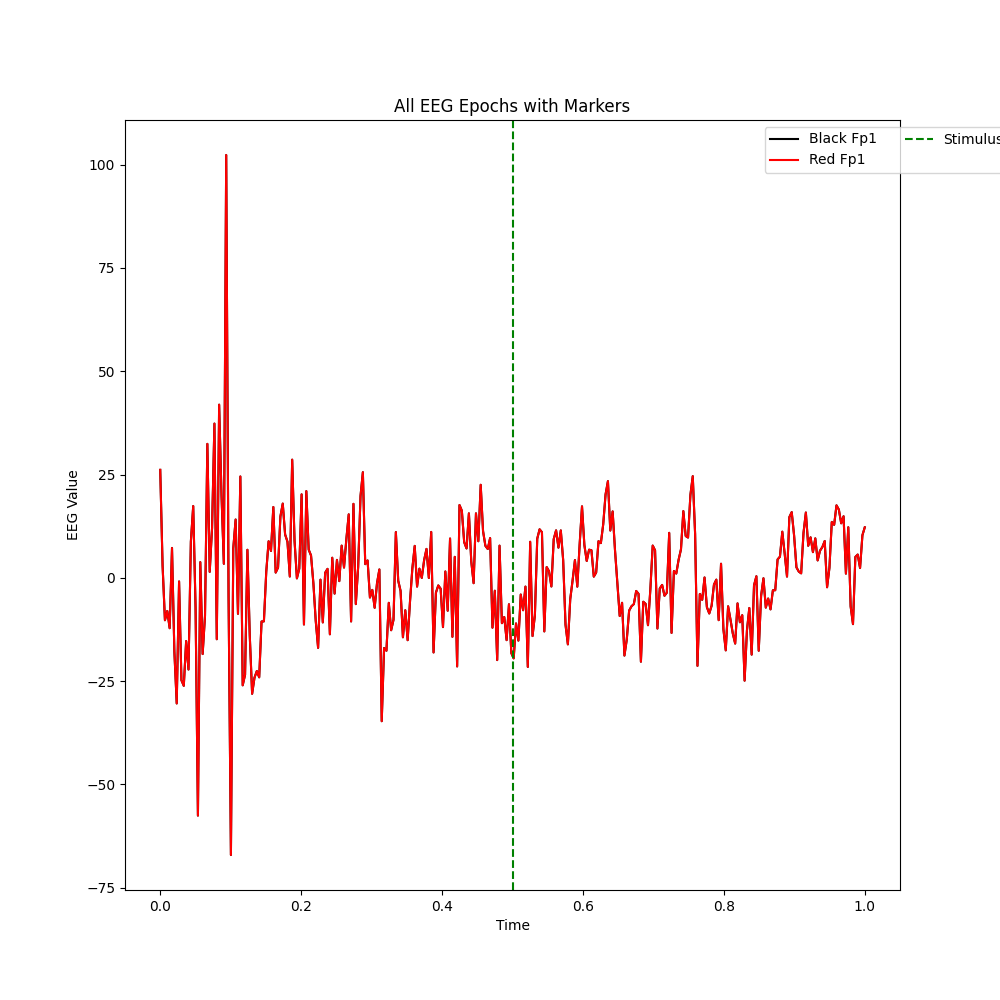

Fp2  - T-statistic: -5.938578637209509e-15
Fp2  - P-value: 0.9999999999999953
Fp2 - Significant points: False


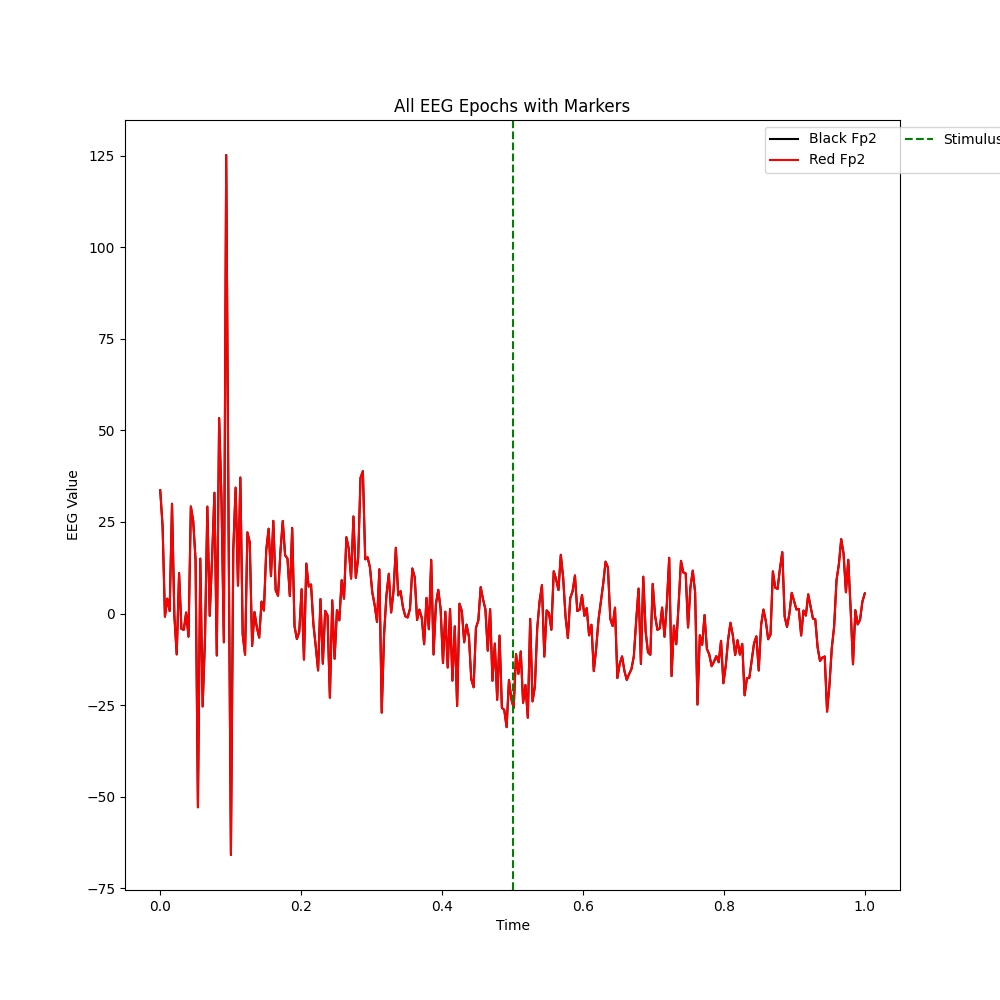

F3  - T-statistic: 6.1073755994432396e-15
F3  - P-value: 0.9999999999999951
F3 - Significant points: False


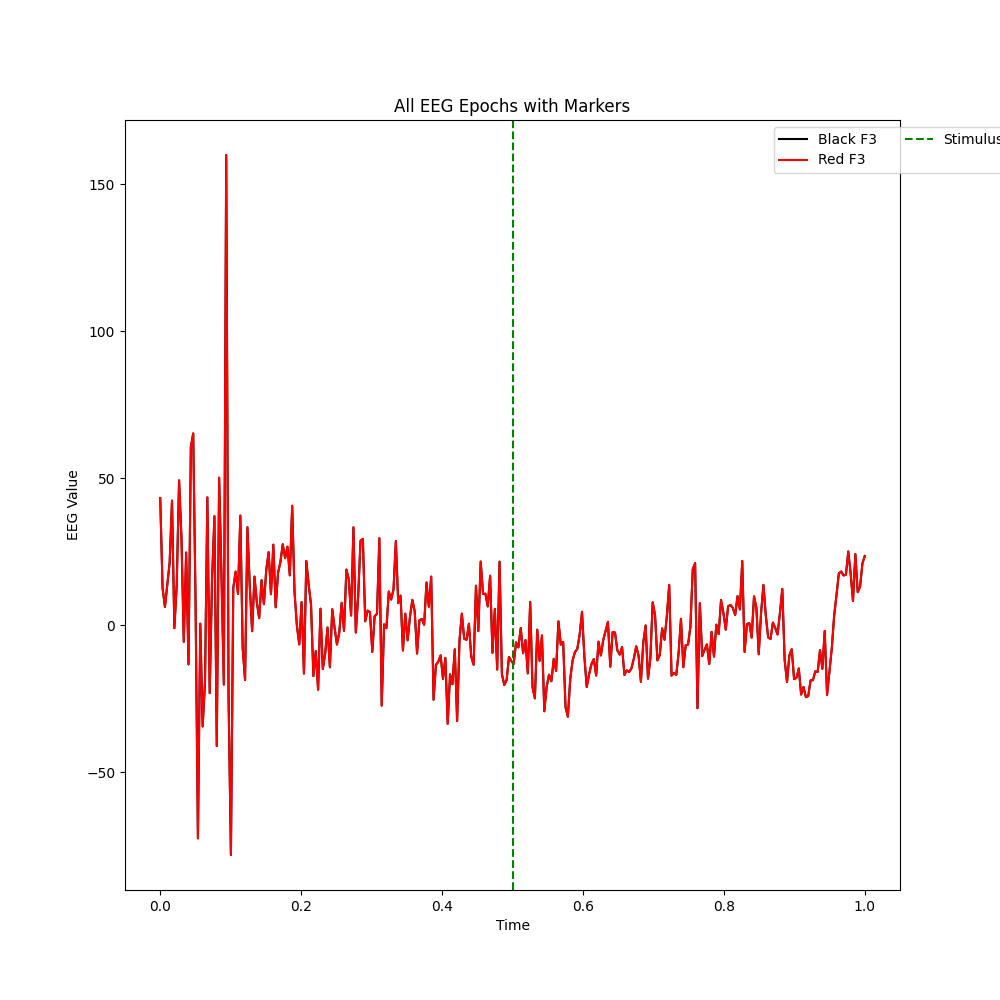

F7  - T-statistic: 5.642767028272592e-15
F7  - P-value: 0.9999999999999956
F7 - Significant points: False


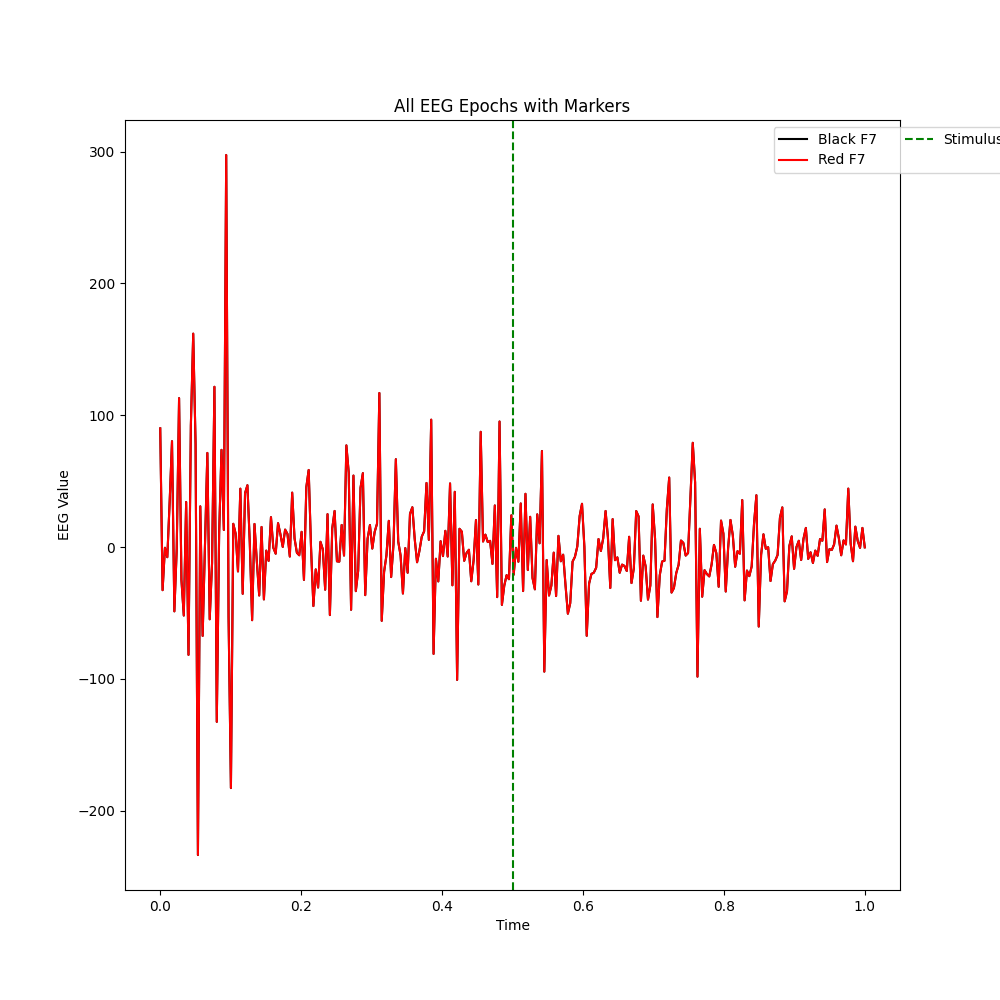

F8  - T-statistic: 5.41408748660104e-15
F8  - P-value: 0.9999999999999958
F8 - Significant points: False


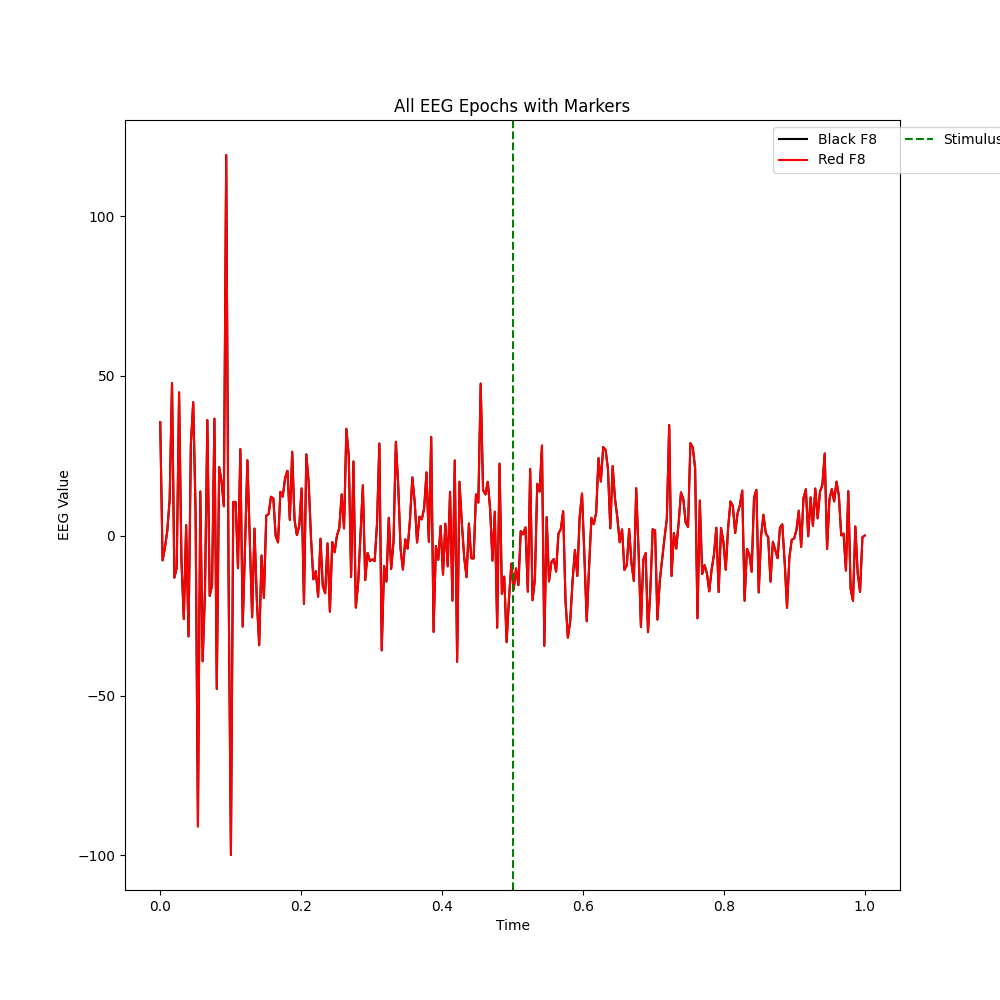

Cz  - T-statistic: 1.038773479183756e-14
Cz  - P-value: 0.9999999999999918
Cz - Significant points: False


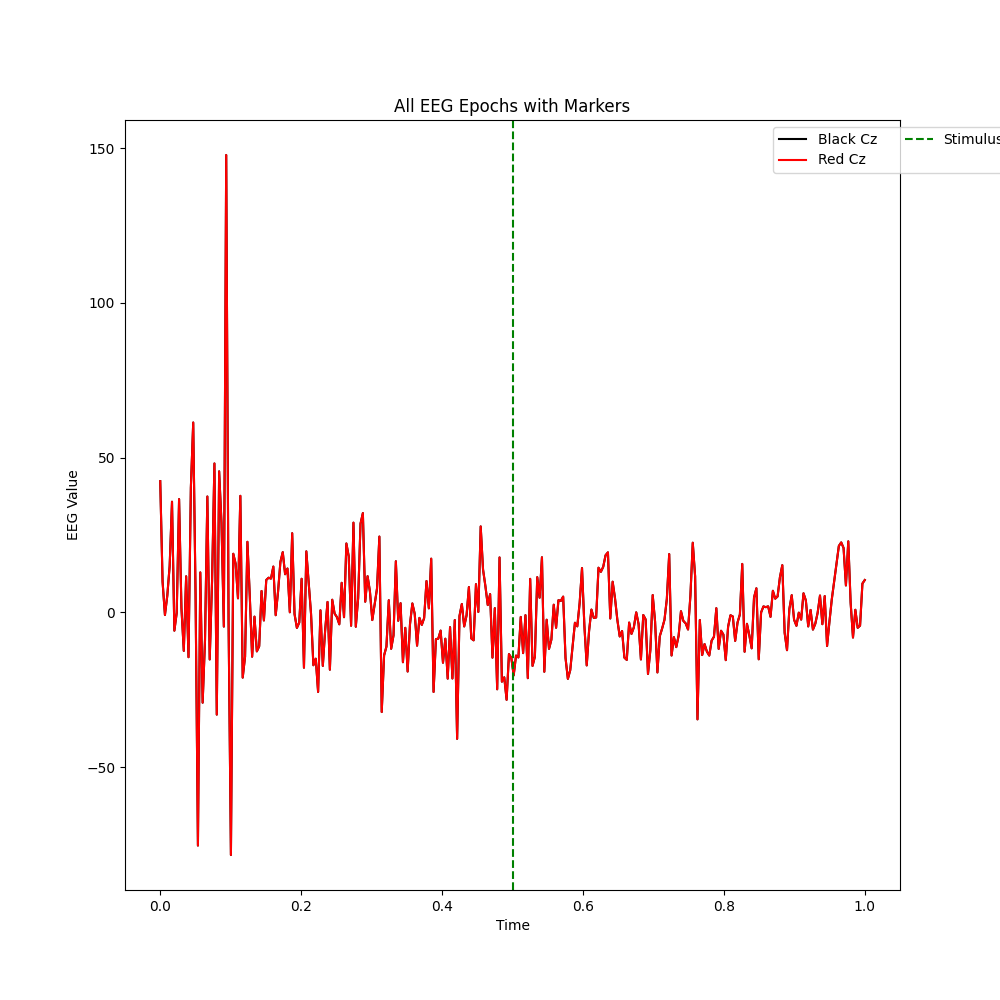

C3  - T-statistic: -3.8063120265593435e-15
C3  - P-value: 0.999999999999997
C3 - Significant points: False


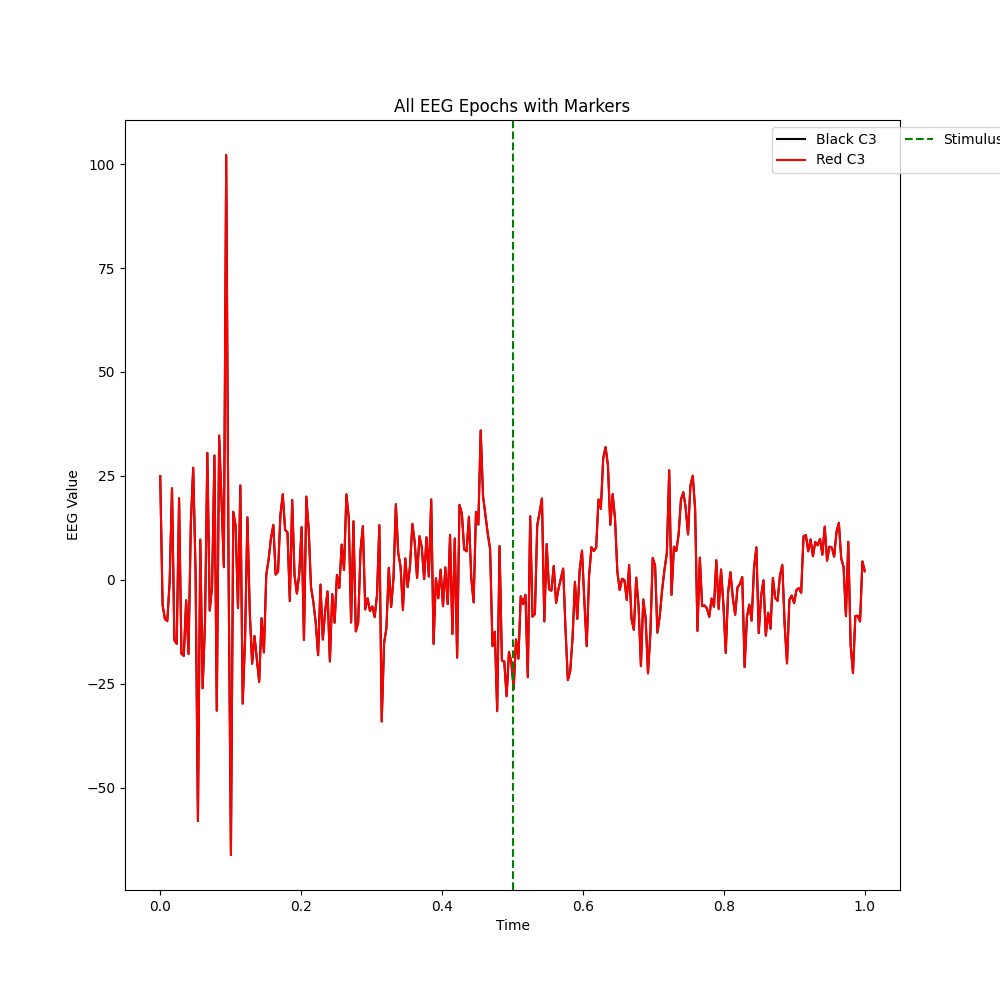

C4  - T-statistic: -2.64497315721653e-15
C4  - P-value: 0.9999999999999979
C4 - Significant points: False


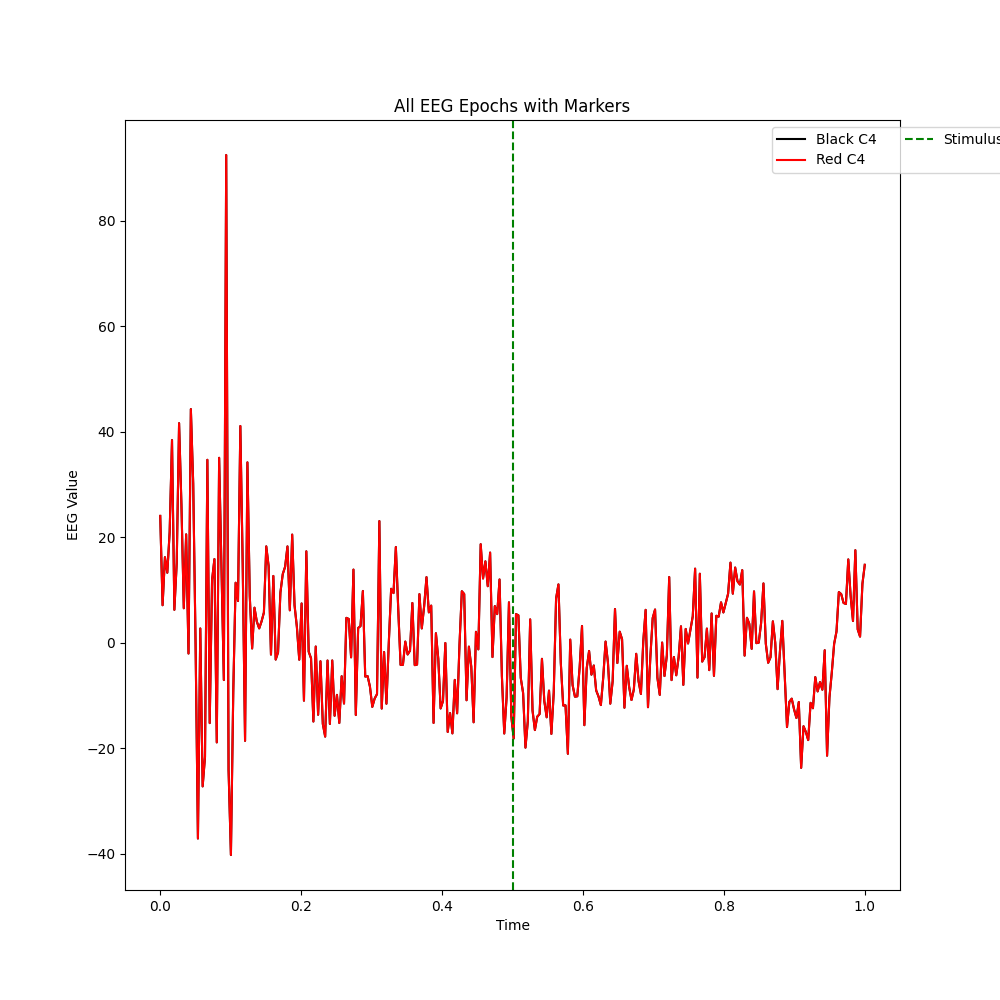

T4  - T-statistic: 2.0701080748360064e-14
T4  - P-value: 0.9999999999999836
T4 - Significant points: False


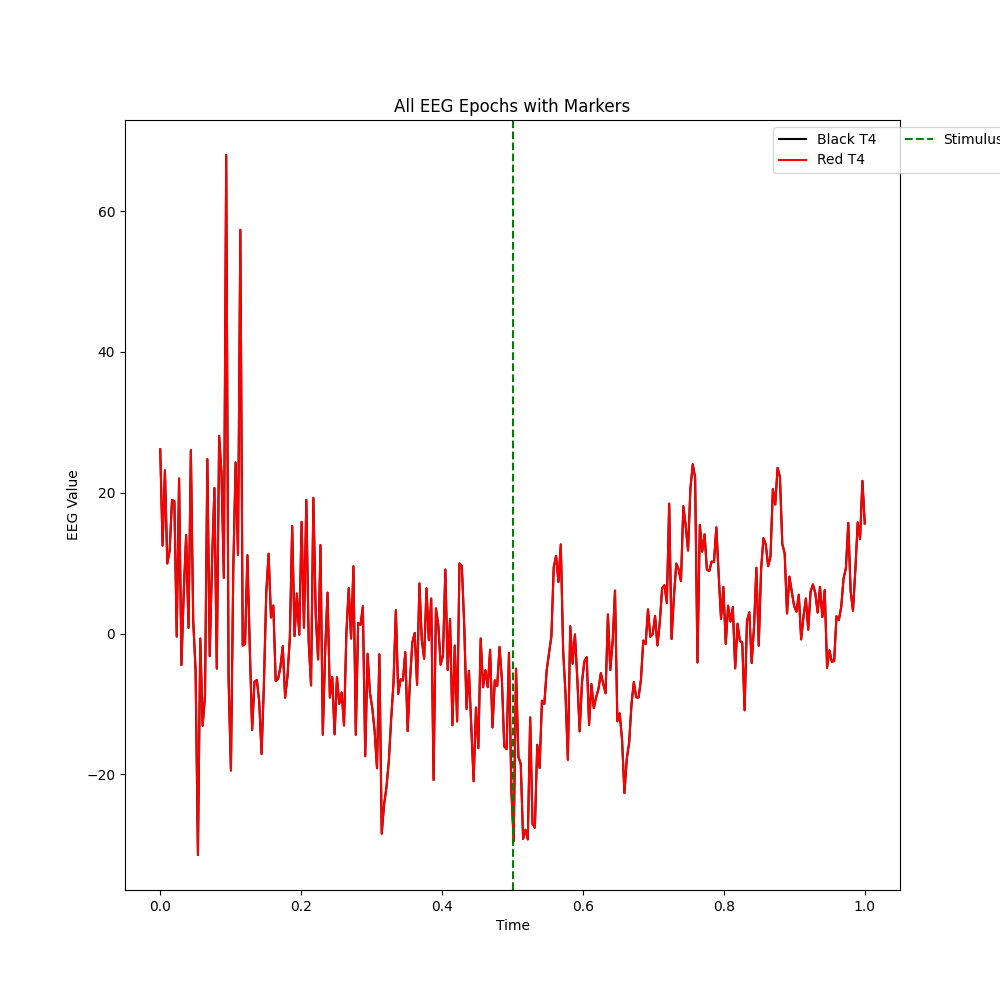

T5  - T-statistic: -4.898231615643996e-15
T5  - P-value: 0.9999999999999961
T5 - Significant points: False


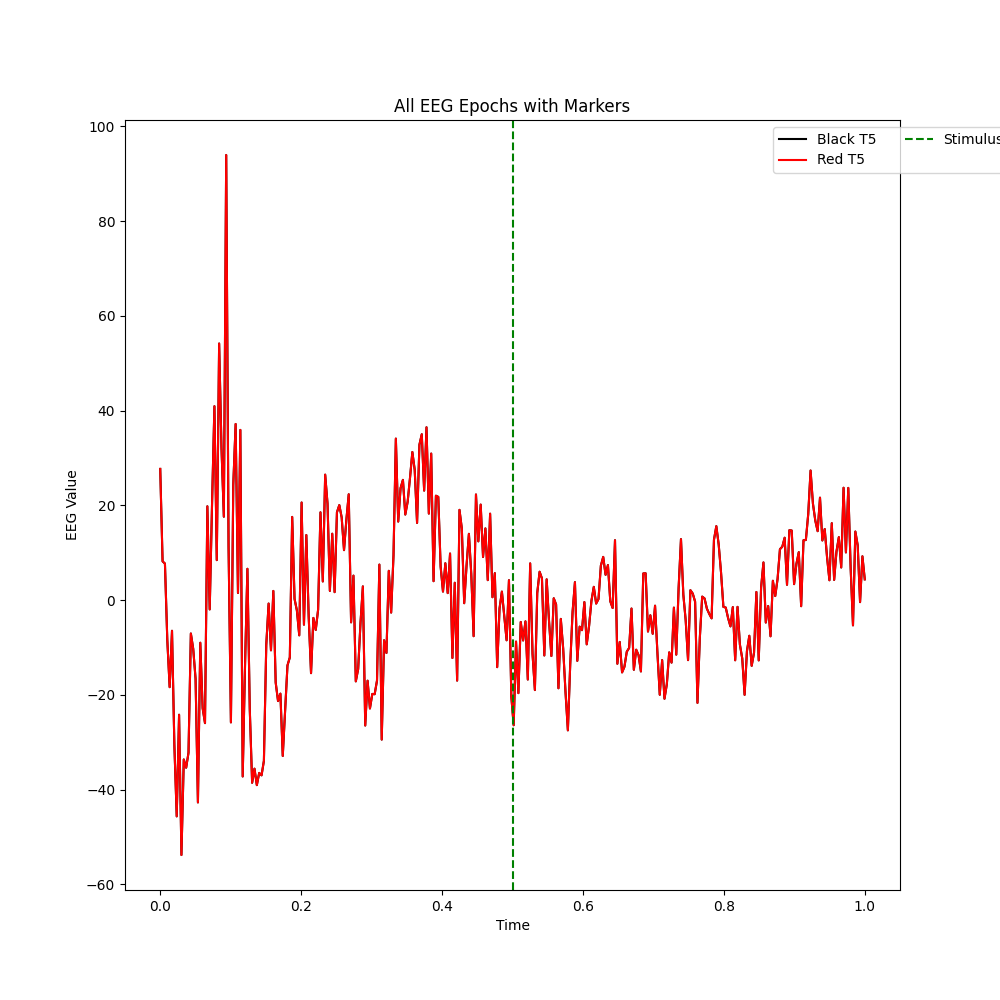

T6  - T-statistic: 9.171168900476902e-15
T6  - P-value: 0.9999999999999927
T6 - Significant points: False


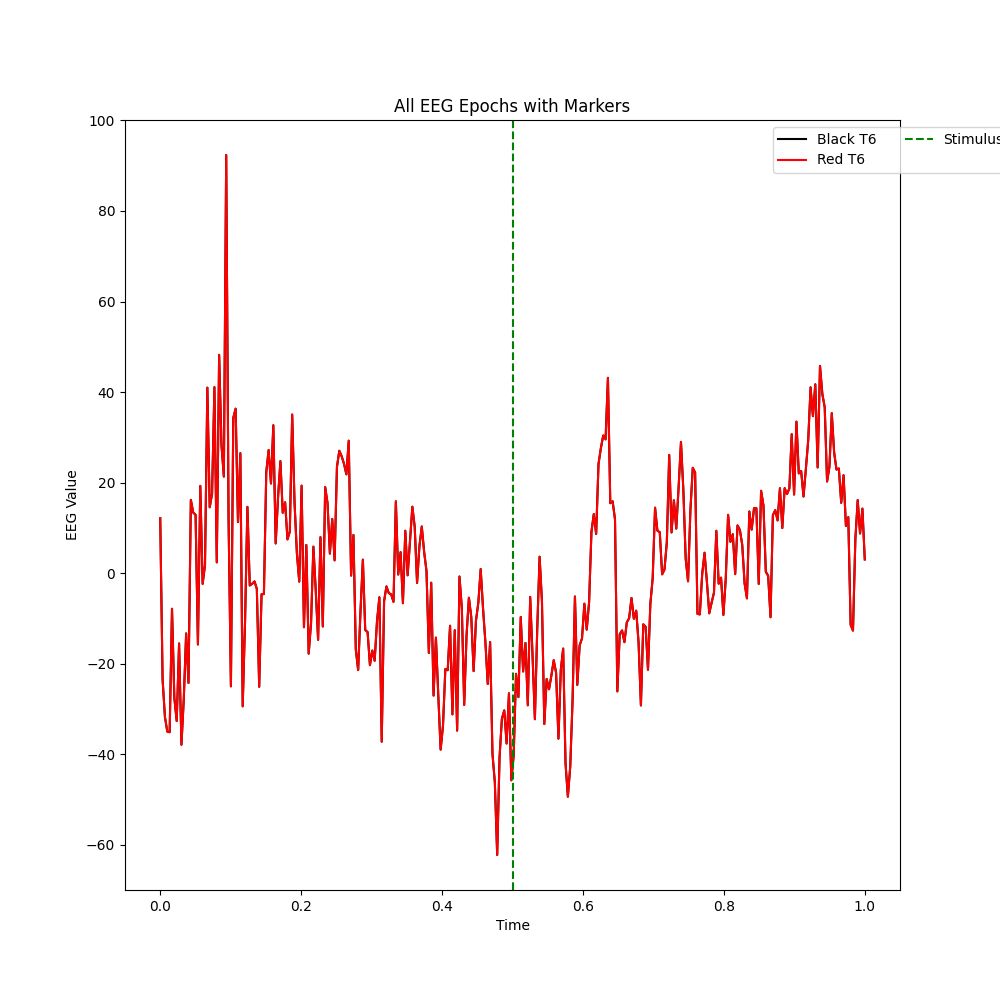

Pz  - T-statistic: -1.6784390138956155e-14
Pz  - P-value: 0.9999999999999867
Pz - Significant points: False


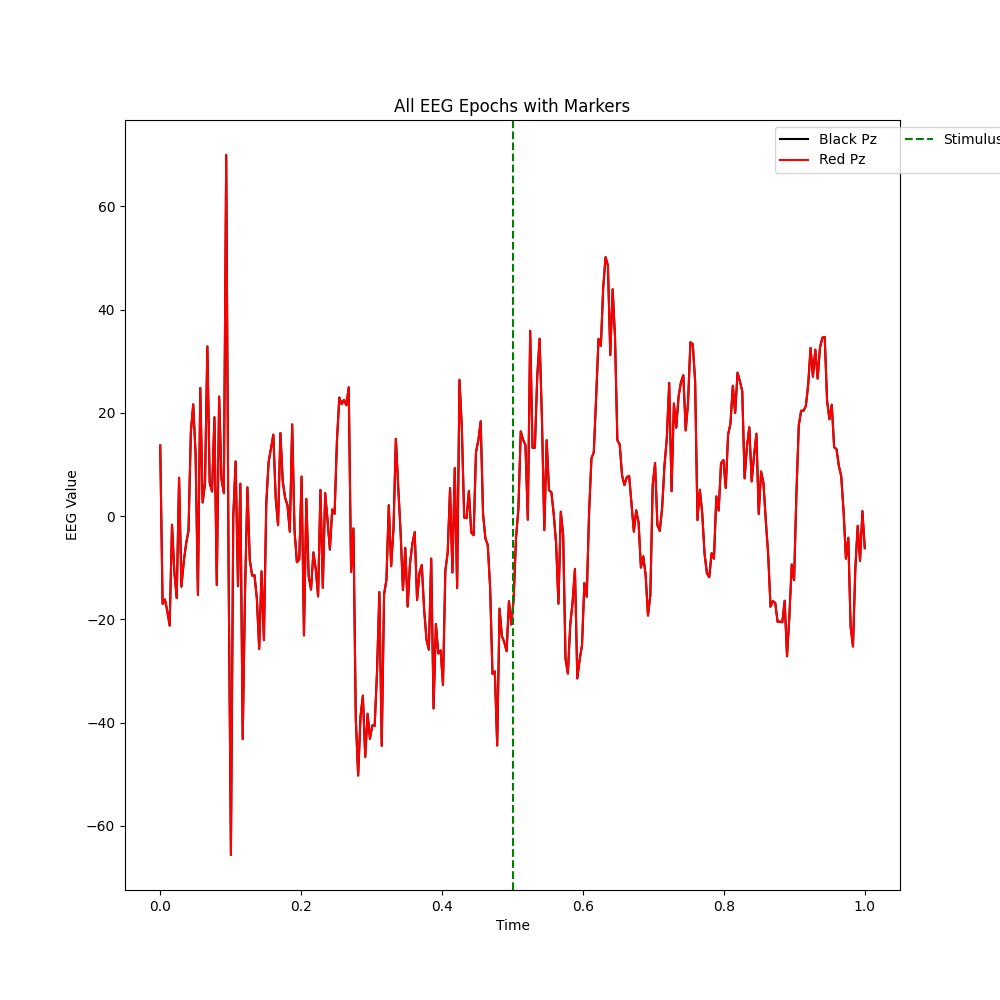

A2  - T-statistic: -1.0744123379931675e-14
A2  - P-value: 0.9999999999999915
A2 - Significant points: False


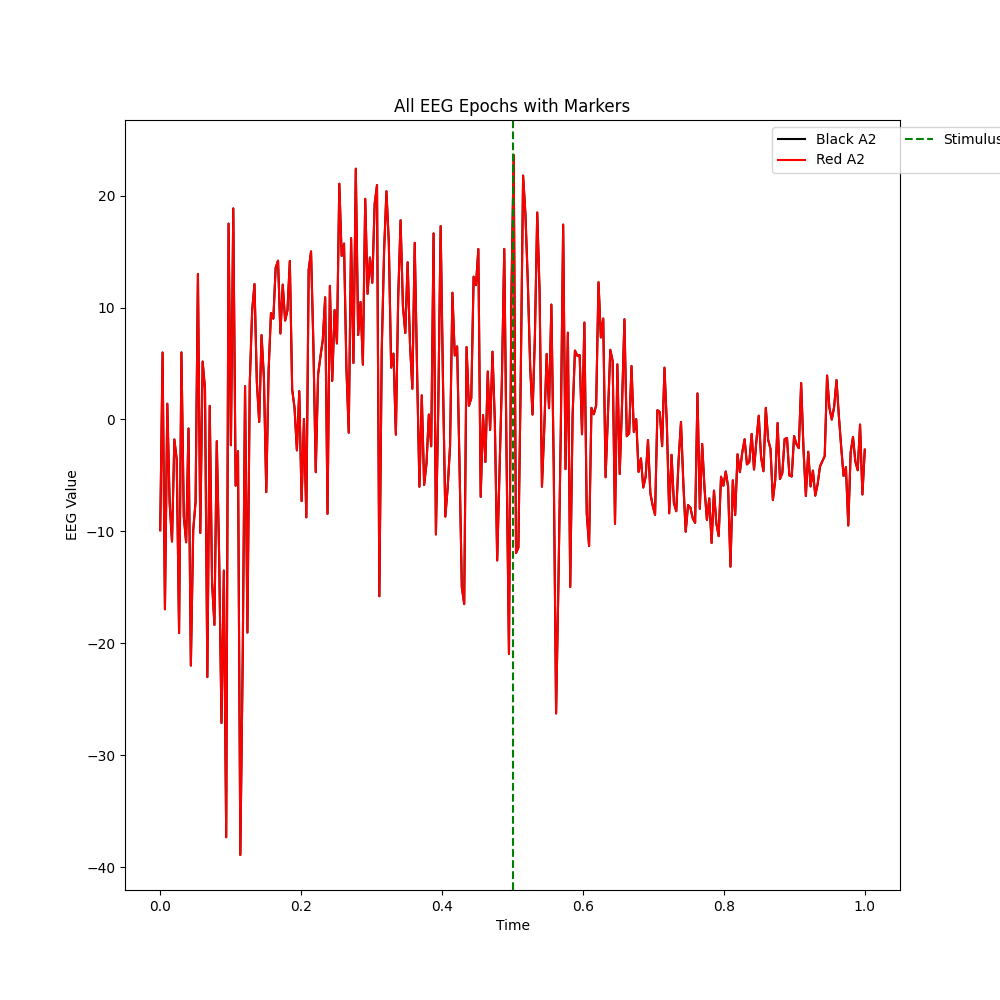

In [5]:
from scipy.stats import ttest_ind

# Define a function to create epochs around markers
def create_epochs(eeg_data, markers, epoch_duration=1.0, sampling_rate=300):
    epochs = []
    half_epoch_samples = int(epoch_duration * sampling_rate / 2)
    time_column = eeg_data.columns[-1]
    
    for index, marker in markers.iterrows():
        if (len(marker['Marker']) == 12):
            marker_time = marker['Time']
            # Find the closest time point in the EEG data
            closest_idx = (np.abs(eeg_data[time_column] - marker_time)).argmin()
            
            # Get the start and end indices for the epoch
            start_idx = max(0, closest_idx - half_epoch_samples)
            end_idx = min(len(eeg_data), closest_idx + half_epoch_samples)
    
            
            # Extract the epoch
            epoch = eeg_data.iloc[start_idx:end_idx].copy()
    
            if (str(marker['Marker'])[9] == str(marker['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
                epoch["Colour"] = "Red"
            else:
                epoch["Colour"] = "Black"
                
            epochs.append(epoch)
    
    return epochs

# Create epochs
channel_names = raw_clean.ch_names
eeg_data_filtered = raw_clean.get_data()
eeg_data_filtered = pd.DataFrame(eeg_data_filtered.T, columns=channel_names)
sampling_rate = 300  # Assuming a sampling rate of 256 Hz
epochs = create_epochs(eeg_data_filtered, markers, epoch_duration=1.0, sampling_rate=sampling_rate)


#print example epoch data
print(epochs[0])


# # Plot all epochs on the same plot
# plt.figure(figsize=(10, 10))


# overall_red_avg = 0
# overall_black_avg = 0
# overall_count = 0


# Now we will plot each channel individually, averaging its epochs
# iterate through each channel not deemed to be bad
for ind, channel in enumerate(channel_columns_filtered):

    # Initialize lists to collect P300 window data
    red_p300_data = []
    black_p300_data = []

    # Plot epochs on their own  plot
    plt.figure(figsize=(10, 10))
    
    black_first = True
    red_first = True
    red_avg = 0
    black_avg = 0
    black_count = 0
    red_count = 0

    # iterate through each epoch for the channel
    for epoch_index, epoch in enumerate(epochs):
    
                
            
    
        plotted_color = epoch.iloc[0,-1]

        # get channel epoch and do baseline correction
        new_val = epoch[channel].values
        new_val -= epoch[channel].mean()

        
        if plotted_color == "Red":
            if red_first:
                red_avg = new_val
                red_first = False
                red_count += 1
            else:
                if (red_avg.shape == new_val.shape):
                    red_avg += new_val
                    red_count += 1
        else:
            if black_first:
                black_avg = new_val
                black_first = False
                black_count += 1
            else:
                if (black_avg.shape == new_val.shape):
                    black_avg += new_val
                    black_count += 1

    black_avg = black_avg/black_count
    red_avg = red_avg/red_count
    # overall_red_avg += red_avg
    # overall_black_avg += black_avg
    # overall_count += 1

    red_p300_data = red_avg[225:255] # isolate the p300 area (0.75s to 0.85 approx)
    black_p300_data = black_avg[225:255] 

    # generate sampling_rate points to plot on x axis
    x = np.linspace(0, 1, sampling_rate)

    
    # Perform t-test
    t_stat, p_value = ttest_ind(red_p300_data, black_p300_data)
    
    print(channel, " - T-statistic:", t_stat)
    print(channel, " - P-value:", p_value)

    # Mark significant points
    significance_level = 0.05
    significant_points = p_value < significance_level
    print(channel+ " - Significant points:", significant_points)

    #overall_red_avg = overall_red_avg/overall_count
    #overall_black_avg = overall_black_avg/overall_count
    plt.plot(x, black_avg, label= "Black "+ channel, color="Black") #f'Epoch {epoch_index+1} - Channel {index+1}', alpha=0.5)
    plt.plot(x, red_avg, label= "Red "+ channel, color="Red") 
    plt.axvline(x=0.5, color='g', linestyle='--', label='Stimulus')
    
    
    plt.xlabel('Time')
    plt.ylabel('EEG Value')
    plt.title('All EEG Epochs with Markers')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2)
    plt.show()
